In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import colorama
from colorama import Fore

In [66]:
labelled = pd.read_csv('labeled_data.csv', delimiter=',',encoding='utf-8', header = 0, error_bad_lines=False)
df = pd.read_csv('bad.csv')
nonos = df.values.tolist()

In [67]:
labelled

Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0               0      3            0                   0        3      2   
1               1      3            0                   3        0      1   
2               2      3            0                   3        0      1   
3               3      3            0                   2        1      1   
4               4      6            0                   6        0      1   
...           ...    ...          ...                 ...      ...    ...   
24778       25291      3            0                   2        1      1   
24779       25292      3            0                   1        2      2   
24780       25294      3            0                   3        0      1   
24781       25295      6            0                   6        0      1   
24782       25296      3            0                   0        3      2   

                                                   tweet  
0      !!! RT @mayasolovely: As a woman you shouldn't...  
1      !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2      !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3      !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4      !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  
...                                                  ...  
24778  you's a muthaf***in lie &#8220;@LifeAsKing: @2...  
24779  you've gone and broke the wrong heart baby, an...  
24780  young buck wanna eat!!.. dat nigguh like I ain...  
24781              youu got wild bitches tellin you lies  
24782  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...  

[24783 rows x 7 columns]

In [68]:
tweet2 = labelled['tweet']

In [69]:
tweet3 = tweet2.tolist()

In [70]:
print(tweet3)

["!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...", '!!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!', '!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit', '!!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny', '!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;', '!!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"', '!!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"', "!!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skinny girls!!&#8221;", '" &amp; you might not get ya bitch back &amp; thats that "', 

In [71]:
def flatten_list(nonos):
    new_list = []
    for x in nonos:
        if type(x) is list:
            for item in x:
                new_list.append(item)
        else:
            new_list.append(x)
    return new_list

flat_list = flatten_list(nonos)

In [72]:
good_list = []
bad_list = []
for i in tweet3:
    user_input = i.lower()
    
    new_user_input = re.sub('[^a-zA-Z0-9 \n\.]', '', user_input)
    
    new_user_input = "".join([i for i in user_input if not i.isdigit()])
    
    new_user_input = "".join([i for i in user_input if i not in ("?",".",",",";",":","!",'"',"'","&")])
    
    user_input_list = new_user_input.split()
    
    input_set = set(user_input_list)
    
    intersection = input_set.intersection(flat_list)

    intersection_as_list = list(intersection)

    check = any(item in user_input_list for item in flat_list)

    for x in user_input_list:
        if x in flat_list:
            print('')#new_user_input,':', Fore.RED + x)
            #Question: is it possible to set the colour of the 'bad' words within the new_user_input printed string without
            #repeating the word after the sentence. Example; hello this is a (bad word) test. --> hellop this is a (bad word in red) test.
        else:
            continue


    if check == True:
        bad_list.append(intersection_as_list)
        print(Fore.RED + new_user_input)
        print(Fore.RED + "The bad word(s) found in the text were:", intersection_as_list)
    if check == False:
        good_list.append(new_user_input)
        #print(Fore.GREEN + new_user_input)
        #print(Fore.GREEN + "No bad words were found in the inputted text!")
        


 rt @mleew17 boy dats coldtyga dwn bad for cuffin dat hoe in the 1st place
The bad word(s) found in the text were: ['hoe']



 rt @urkindofbrand dawg rt @80sbaby4life you ever fuck a bitch and she start to cry you be confused as shit
The bad word(s) found in the text were: ['shit', 'bitch', 'fuck']

 rt @c_g_anderson @viva_based she look like a tranny
The bad word(s) found in the text were: ['tranny']


 rt @shenikaroberts the shit you hear about me might be true or it might be faker than the bitch who told it to ya #57361
The bad word(s) found in the text were: ['shit', 'bitch']



@t_madison_x the shit just blows meclaim you so faithful and down for somebody but still fucking with hoes #128514#128514#128514
The bad word(s) found in the text were: ['fucking', 'shit', 'hoes']


@__brighterdays i can not just sit up and hate on another bitch  i got too much shit going on
The bad word(s) found in the text were: ['shit', 'bitch']

#8220@selfiequeenbri cause im tired of you big bitches co

In [73]:
#length of good list
len(good_list)

4707

In [74]:
good_list

[' rt @mayasolovely as a woman you shouldnt complain about cleaning up your house amp as a man you should always take the trash out',
 '@addicted2guys -simplyaddictedtoguys http//tco/1jl4hi8zmf woof woof hot scally lad',
 '@allaboutmanfeet http//tco/3gzupfumev woof woof and hot soles',
 '@allyhaaaaa lemmie eat a oreo amp do these dishes one oreo lol',
 '@babyanimalpics baby monkey bathtime http//tco/7kpwadlf0r\nawwwwe this is soooo adorable',
 '@domworldpeace baseball season for the win #yankees this is where the love started',
 '@dunderbail im an early bird and im a night owl so im wise and have worms',
 '@el_grillo1 pit bulls photographed as lovely fairy tale creatures http//tco/q0sm89oolh#8221\n\nthey *are* fairy tale creatures',
 '@flokid88 as long as the lakers trash from now on i could careless and thats real cc @benballer hahaha',
 '@funnypicsdepot this the i play soccer cheat on girls and wear khaki coloured cargos haircut http//tco/zuai7qwbir #128514 yup',
 '@hermosaalma this 

In [75]:
# We had a list within a list, so we are flattening the list of bad words and put into dataframe
flat_bad = flatten_list(bad_list)
df_bad = pd.DataFrame(flat_bad)

In [76]:
# give columns headers
df_bad_count = df_bad.value_counts().rename_axis("Bad Words").reset_index(name="Counts")

In [77]:
df_bad_count

Bad Words  Counts
0       bitch    7653
1     bitches    2922
2        hoes    2188
3       pussy    1975
4         hoe    1751
..        ...     ...
391  headfuck       1
392      puto       1
393    herpes       1
394    hookah       1
395      jock       1

[396 rows x 2 columns]

In [78]:
bad_count_frequent = df_bad_count[df_bad_count["Counts"] > 20]
bad_count_frequent.describe()

Counts
count    84.000000
mean    353.940476
std     962.329545
min      21.000000
25%      32.000000
50%      72.000000
75%     221.250000
max    7653.000000

In [79]:
bad_count_frequent

Bad Words  Counts
0      bitch    7653
1    bitches    2922
2       hoes    2188
3      pussy    1975
4        hoe    1751
..       ...     ...
79       fuk      23
80     dykes      22
81   panties      21
82   cripple      21
83      bone      21

[84 rows x 2 columns]

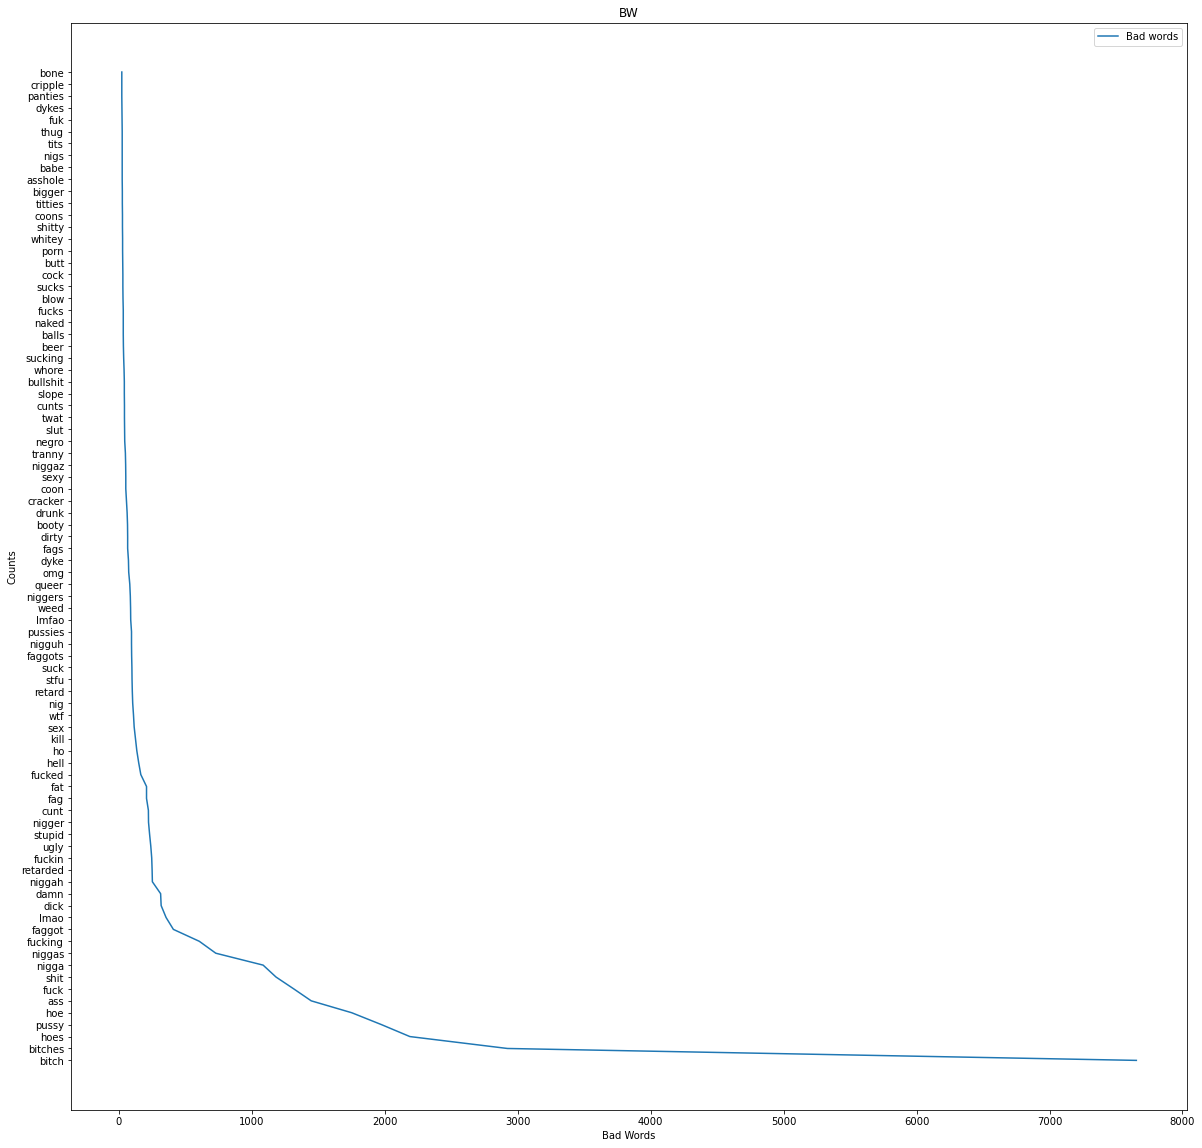

In [80]:
#Changing the size of the figure
plt.figure(figsize=(20, 20))

#Plotting a visualization .plot(x, y, data=data)
plt.plot('Counts', 'Bad Words', data=bad_count_frequent)

#Giving the visualization a title
plt.title("BW")

#Giving the x-axis a name
plt.xlabel("Bad Words")

#Giving the y-axis a name

plt.ylabel("Counts")

#Adding a legend
plt.legend(['Bad words'])

plt.show()